# PROJECT - ECOMMERCE - CUSTOMER LIFETIME VALUE

## A. Các chỉ số cần phải hiểu

1. Định nghĩa về customer lifetime value	
    * Customer lifetime value (CLV) = Số tiền mà công ty mong đợi kiếm được từ một khách hàng trung bình trong một thời gian sống
	* CLV cho phép đánh giá khách hàng và xác định số tiền mà công ty có thể chi ra để có khách hàng
	    - Historical CLV = Tổng doanh thu tất cả các giao dịch khách hàng nhân với tỷ suất lợi nhuận trung bình của các cấp sản phẩm
	* Một số vấn đề trong CLV
	    - Không tính đến thời gian sử dụng, giữ chân hoặc dừng hoạt của khách hàng (Nếu công ty đang muốn phát triển cơ sở khách hàng thì CLV lịch sử sẽ là 1 phương án để lấy thông tin trong thời sử dụng ngắn)
	    - Không tính đến khách hàng mới và doanh thu trong tương lai của họ
2. Giả định cần phải có trong bài toán
	- Giả định tuổi thọ trung bình của khách hàng thương 36 tháng
3. Các chỉ số cần thiết
    - Basic CLV = Average Revenue per Month * Average Lifespan 	
        - CLV cơ bản = Doanh thu trung bình mỗi tháng * Tuổi thọ trung bình
            - Basic CLV = Average Revenue Profit Margin Average Lifespan - Doanh thu trung bình lợi nhuận biên tuổi thọ trung bình
            - Where Average Lifespan is e.g. average time before customer churn - trong đó Tuổi thọ trung bình là thời gian trung bình trước khi khách hàng rời đi
    - Granular CLV = (Average Revenue per Transaction * Average Frequency per Month) * Average Lifespan	
        - CLV chi tiết = (Doanh thu trung bình trên mỗi giao dịch * Tần suất trung bình mỗi tháng) * Tuổi thọ trung bình
            - where Avg Frequency is within the certain timeframe, e.g. a month - trong đó Tần suất trung bình nằm trong khung thời gian nhất định, ví dụ: một tháng
            - Accounts for each transaction - Tài khoản của mỗi giao dịch
    - Traditional CLV = Average Revenue * (Retention Rate / Churn Rate)	
        - CLV truyền thống = Doanh thu Trung bình * (Tỷ lệ Giữ chân / Tỷ lệ khách hàng bỏ đi)
            - Traditional CLV = (Average Revenue Profit Margin) Retention Rate / Churn Rate
            - Where Churn = 1 - Retention Rate - Tỉ lệ khách hàng bỏ công ty = 1 - tỉ lệ giữ chân khách hàng
            - Retention/Churn - a proxy of expected length of customer lifespan with the company - Giữ chân/ khách hàng bỏ đi - đại diện cho thời gian tồn tại dự kiến của khách hàng với công ty
            - Account for customer loyalty assumes that churn is final and customers do not return (especially critical for non-contractual business models) - Tính đến lòng trung thành của khách hàng, giả định rằng thời gian ngừng hoạt động là cuối cùng và khách hàng không quay lại (đặc biệt quan trọng đối với các mô hình kinh doanh không theo hợp đồng)
            - Because we don't have profit margin, we will calculate revenue-based CLV - Bởi vì chúng tôi không có tỷ suất lợi nhuận, chúng tôi sẽ tính CLV dựa trên doanh thu


## B. Thực hiện bài toán

### 1.0. Import libary

In [1]:
import pandas as pd
import numpy as np

### 1.1. Load data and Explore data

In [6]:
# 2. Upload data => name file: House_data.xlsx
dir_file = "data/OnlineRetail.csv"
df = pd.read_csv(dir_file, encoding='latin1')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
print("number of unique customers:", df['CustomerID'].nunique())

number of unique customers: 4372


In [10]:
#checking duplicates
print(f"there are {df.duplicated().sum()} duplicated rows")

there are 5268 duplicated rows


In [11]:
#viewing duplicated rows
df[df.duplicated()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,01-12-2010 11:49,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,01-12-2010 11:49,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,01-12-2010 11:49,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,01-12-2010 11:49,3.75,17920.0,United Kingdom


#### Xóa dữ liệu duplicates

In [12]:
retail = df.drop_duplicates(keep='first')


In [13]:
#checking missing values
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
retail = retail[retail['CustomerID'].notna()]

In [16]:
# checking types of columns
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### 1.3. Calculating cohort index - Tính toán chỉ số tháng

In [20]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
retail['YearMonth'] = retail['InvoiceDate'].dt.strftime("%Y-%m")
retail['YearMonth'] = pd.to_datetime(retail['YearMonth'])

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
retail['CohortMonth'] = retail.groupby(by=['CustomerID'])['YearMonth'].transform('min')

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
def calculate_cohort_index(df, transactions_col, cohort_month):
    
    year_diff = df[transactions_col].dt.year - df[cohort_month].dt.year

    month_diff = df[transactions_col].dt.month - df[cohort_month].dt.month
    
    cohort_index = year_diff * 12 + month_diff + 1
    
    return cohort_index

In [25]:
retail['CohortIndex'] = calculate_cohort_index(retail, 'InvoiceDate', 'CohortMonth')

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
retail['CohortIndex'].max()

24

In [27]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-01,2011-08-01,2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-01,2011-08-01,2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01,2011-08-01,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01,2011-08-01,2
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,2011-09-01,2011-08-01,2


### 1.4. Calculating Average Active Users per Cohort - Tính số người dùng đang hoạt động trung bình trên mỗi nhóm

In [28]:
users_in_cohorts = retail.groupby(by=['CohortMonth', 'CohortIndex'])['CustomerID'].nunique()

In [29]:
users_in_cohorts = users_in_cohorts.reset_index()
users_in_cohorts.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-01-01,1,98
1,2010-01-01,2,9
2,2010-01-01,3,4
3,2010-01-01,5,7
4,2010-01-01,6,7


In [31]:
cohorts_fin = users_in_cohorts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohorts_fin

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,98.0,9.0,4.0,NaN,7.0,7.0,4.0,10.0,10.0,5.0,...,38.0,40.0,36.0,44.0,41.0,37.0,41.0,44.0,40.0,23.0
2010-02-01,108.0,2.0,NaN,NaN,3.0,7.0,5.0,12.0,5.0,NaN,...,39.0,38.0,43.0,48.0,34.0,41.0,45.0,53.0,19.0,NaN
2010-03-01,49.0,NaN,1.0,1.0,1.0,2.0,5.0,NaN,NaN,14.0,...,23.0,16.0,19.0,19.0,13.0,24.0,23.0,9.0,NaN,NaN
2010-05-01,68.0,3.0,3.0,2.0,3.0,1.0,NaN,24.0,32.0,20.0,...,30.0,32.0,31.0,33.0,40.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,76.0,2.0,4.0,4.0,1.0,NaN,26.0,29.0,25.0,25.0,...,27.0,33.0,26.0,39.0,5.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,53.0,2.0,2.0,1.0,NaN,9.0,24.0,22.0,22.0,19.0,...,22.0,20.0,29.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,87.0,3.0,2.0,NaN,30.0,37.0,30.0,34.0,33.0,36.0,...,41.0,49.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,83.0,1.0,NaN,23.0,29.0,20.0,30.0,23.0,29.0,26.0,...,32.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,38.0,NaN,11.0,15.0,12.0,15.0,18.0,8.0,14.0,11.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.5. Calculating Retention Rates - Tính toán tỉ lệ người duy trì

In [39]:
cohort_sizes = cohorts_fin.iloc[:, 0]
retention = cohorts_fin.divide(cohort_sizes, axis='rows').round(3)

In [40]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.0,0.092,0.041,NaN,0.071,0.071,0.041,0.102,0.102,0.051,...,0.388,0.408,0.367,0.449,0.418,0.378,0.418,0.449,0.408,0.235
2010-02-01,1.0,0.019,NaN,NaN,0.028,0.065,0.046,0.111,0.046,NaN,...,0.361,0.352,0.398,0.444,0.315,0.380,0.417,0.491,0.176,NaN
2010-03-01,1.0,NaN,0.020,0.020,0.020,0.041,0.102,NaN,NaN,0.286,...,0.469,0.327,0.388,0.388,0.265,0.490,0.469,0.184,NaN,NaN
2010-05-01,1.0,0.044,0.044,0.029,0.044,0.015,NaN,0.353,0.471,0.294,...,0.441,0.471,0.456,0.485,0.588,0.294,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.026,0.053,0.053,0.013,NaN,0.342,0.382,0.329,0.329,...,0.355,0.434,0.342,0.513,0.066,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,0.038,0.038,0.019,NaN,0.170,0.453,0.415,0.415,0.358,...,0.415,0.377,0.547,0.113,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,0.034,0.023,NaN,0.345,0.425,0.345,0.391,0.379,0.414,...,0.471,0.563,0.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,1.0,0.012,NaN,0.277,0.349,0.241,0.361,0.277,0.349,0.313,...,0.386,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,1.0,NaN,0.289,0.395,0.316,0.395,0.474,0.211,0.368,0.289,...,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


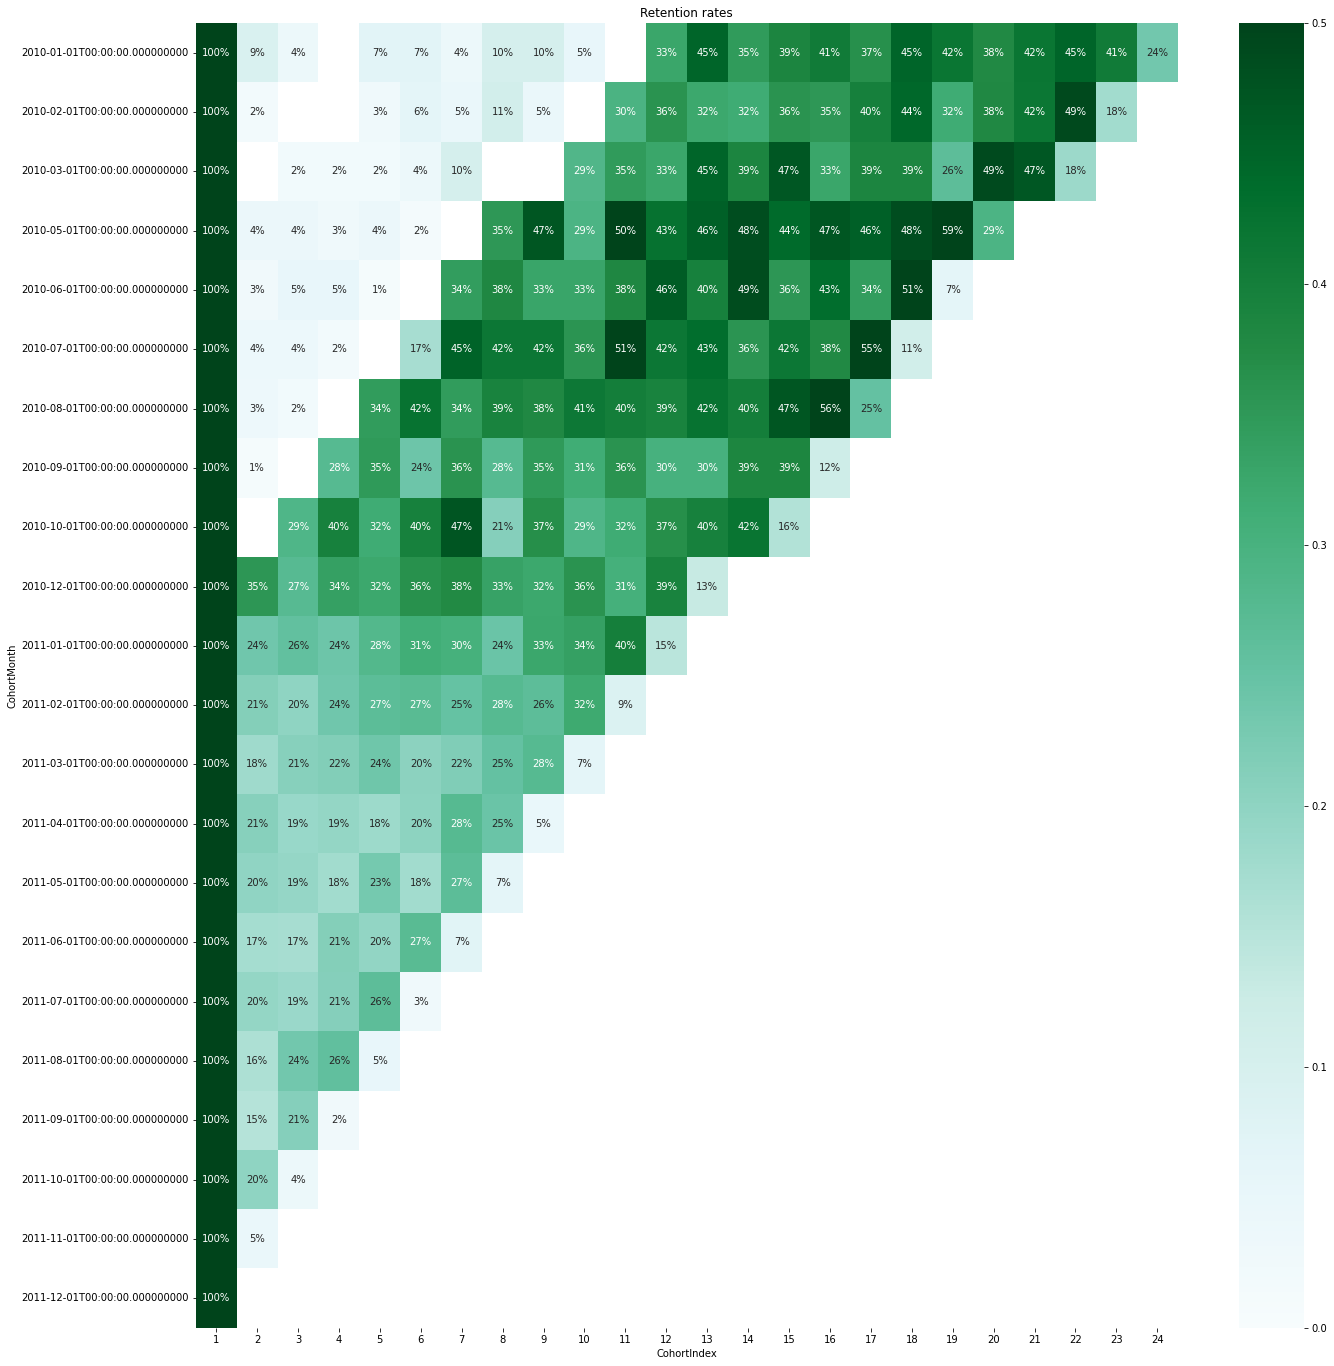

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 24))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'BuGn')
plt.show()

### 1.6. Calculate Basic CLV (revenue-based) - Tính CLV cơ bản dựa trên doanh thu cơ bản

- Basic CLV = Average Revenue per Month * Average Lifespan 	
- CLV cơ bản = Doanh thu trung bình mỗi tháng * Tuổi thọ trung bình
	+ Basic CLV = Average Revenue Profit Margin Average Lifespan - Doanh thu trung bình lợi nhuận biên tuổi thộ trung bình
	+ Where Average Lifespan is e.g. average time before customer churn - trong đó Tuổi thọ trung bình là thời gian trung bình trước khi khách hàng rời đi


In [45]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'YearMonth', 'CohortMonth',
       'CohortIndex'],
      dtype='object')

In [46]:
retail['PurchaseSize'] = retail['Quantity']*retail['UnitPrice']

In [48]:
# calculate monthly spend per customer
monthly_revenue = retail.groupby(by=['CustomerID', 'YearMonth'])['PurchaseSize'].sum().mean()
monthly_revenue

587.5040397416791

### Giả định:
- Tuổi thọ trung bình có thể được suy ra bằng cách xem xét thời gian trung bình mà khách hàng phải bỏ ra kể từ thời điểm họ mua hàng đầu tiên. Hiện tại, chúng tôi giả định rằng tuổi thọ của khách hàng là 3 năm hoặc 36 tháng

In [49]:
lifespan_months = 36

In [50]:
CLV_basic = monthly_revenue * lifespan_months
CLV_basic

21150.145430700446

- Giá trị trọn đời của khách hàng cơ bản là 21,150.14 USD.

### 1.7. Calculate Granular CLV (revenue-based)

- Granular CLV = (Average Revenue per Transaction * Average Frequency per Month) * Average Lifespan	
	- CLV chi tiết = (Doanh thu trung bình trên mỗi giao dịch * Tần suất trung bình mỗi tháng) * Tuổi thọ trung bình
	    + Traditional CLV = (Average Revenue Profit Margin) Retention Rate / Churn Rate
	    + where Avg Frequency is within the certain timeframe, e.g. a month - trong đó Tần suất trung bình nằm trong khung thời gian nhất định, ví dụ: một tháng
	    + Accounts for each transaction - Tài khoản của mỗi giao dịch


In [52]:
# first mean() averages the revenue per invoice 
# second mean() averages the revenue per purchase
revenue_per_purchase = retail.groupby(by=['InvoiceNo'])['PurchaseSize'].mean().mean()
revenue_per_purchase

34.3857251534971

In [55]:
# calculate average number of unique invoices per customer each month
avg_frequency_per_month = retail.groupby(by=['CustomerID', 'YearMonth'])['InvoiceNo'].nunique().mean()
avg_frequency_per_month

1.5747640337804272

In [56]:
CLV_granular = revenue_per_purchase * avg_frequency_per_month * lifespan_months
CLV_granular

1949.3785168987026

- CLV chi tiết là 1949.37 USD, với mỗi khách hàng thực hiện trung bình 1,66 giao dịch mỗi tháng và chi tiêu khoảng 34 USD cho mỗi giao dịch.

### 1.8. Calculate Traditional CLV (revenue-based)

- Traditional CLV = Average Revenue * (Retention Rate / Churn Rate)	
	- CLV truyền thống = Doanh thu Trung bình * (Tỷ lệ Giữ chân / Tỷ lệ khách hàng bỏ đi)
	    - Traditional CLV = (Average Revenue Profit Margin) Retention Rate / Churn Rate
	    - Where Churn = 1 - Retention Rate - Tỉ lệ khách hàng bỏ công ty = 1 - tỉ lệ giữ chân khách hàng
	    - Retention/Churn - a proxy of expected length of customer lifespan with the company - Giữ chân/ khách hàng bỏ đi - đại diện cho thời gian tồn tại dự kiến của khách hàng với công ty
	    - Account for customer loyalty assumes that churn is final and customers do not return (especially critical for non-contractual business models) - Tính đến lòng trung thành của khách hàng, giả định rằng thời gian ngừng hoạt động là cuối cùng và khách hàng không quay lại (đặc biệt quan trọng đối với các mô hình kinh doanh không theo hợp đồng)
	    - Because we don't have profit margin, we will calculate revenue-based CLV - Bởi vì chúng tôi không có tỷ suất lợi nhuận, chúng tôi sẽ tính CLV dựa trên doanh thu


In [58]:
# calculate monthly spend per customer
monthly_revenue = retail.groupby(by=['CustomerID', 'YearMonth'])['PurchaseSize'].sum().mean()
monthly_revenue

587.5040397416791

In [59]:
#calculate average retention rate per customer
avg_retention = retention.iloc[:, 1:].mean().mean()
avg_retention

0.30635798876700243

In [60]:
avg_churn = 1 - avg_retention
avg_churn

0.6936420112329975

In [61]:
CLV_traditional = monthly_revenue * (avg_retention/avg_churn)
CLV_traditional

259.4804713281583

In [62]:
print("Average CLV: {:.2f} USD at {:.1%} average retention rate and {:.2f} USD average monthly revenue".format(CLV_traditional, avg_retention, monthly_revenue))


Average CLV: 259.48 USD at 30.6% average retention rate and 587.50 USD average monthly revenue


- CLV trung bình: 141,69 USD với tỷ lệ giữ chân trung bình 19,0% và doanh thu trung bình hàng tháng là 603,49 USD